<a href="https://colab.research.google.com/github/syedanida/Data-Preparation/blob/main/tabular_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas numpy matplotlib seaborn plotly autoviml sweetviz auto_ds
!pip install scipy==1.7.3


  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
gensim 4.3.3 requires scipy<

In [50]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [51]:
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3


In [52]:
df = pd.read_csv(path + "/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [53]:
# Dataset shape and info
print(df.shape)
print(df.info())
print(df.describe())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

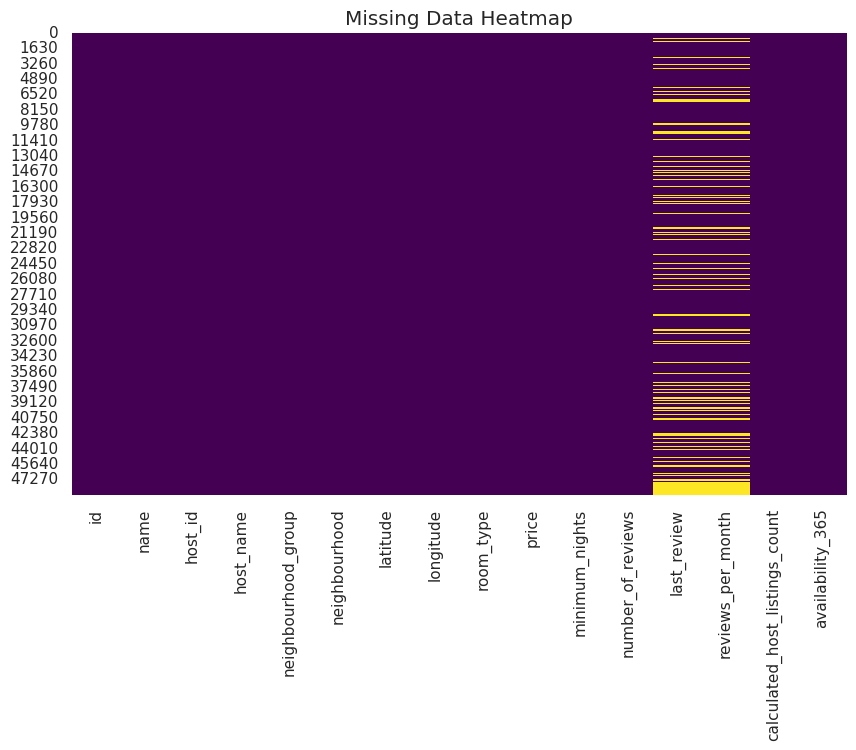

In [54]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [55]:
# Count the missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


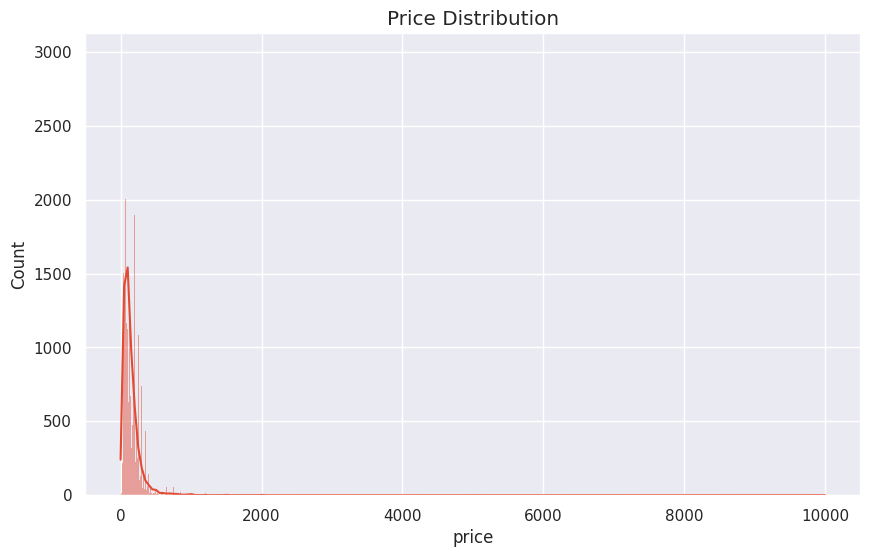

In [56]:
# Visualizing 'price' and 'minimum_nights' distributions
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

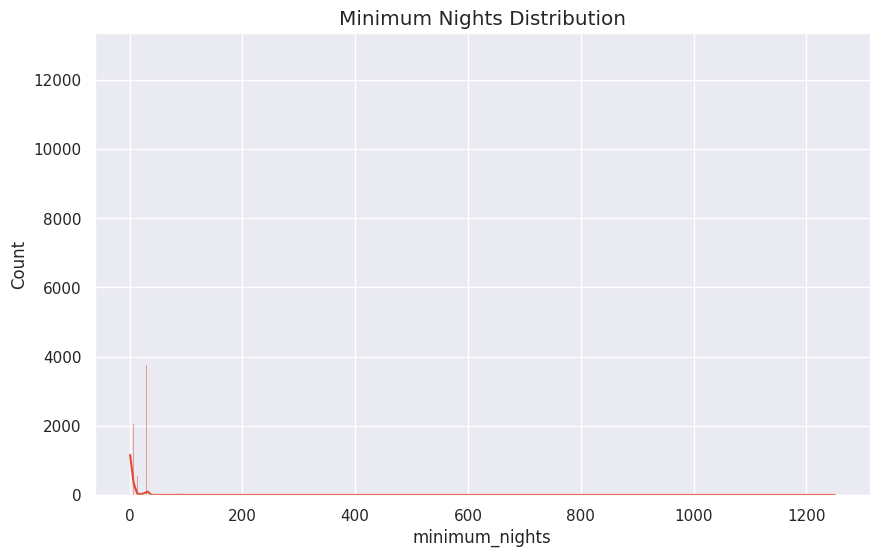

In [57]:
sns.histplot(df['minimum_nights'], kde=True)
plt.title("Minimum Nights Distribution")
plt.show()

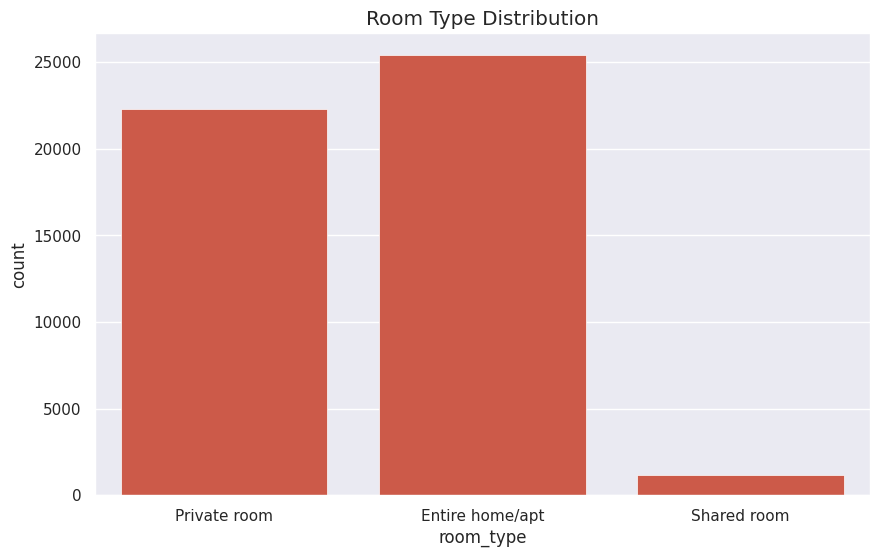

In [58]:
# Count plot for categorical variables
sns.countplot(x='room_type', data=df)
plt.title("Room Type Distribution")
plt.show()

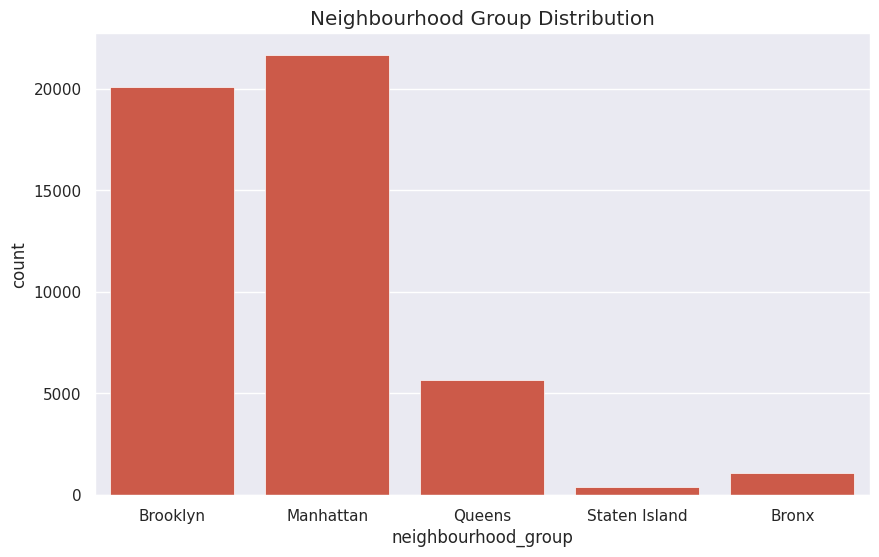

In [59]:
sns.countplot(x='neighbourhood_group', data=df)
plt.title("Neighbourhood Group Distribution")
plt.show()

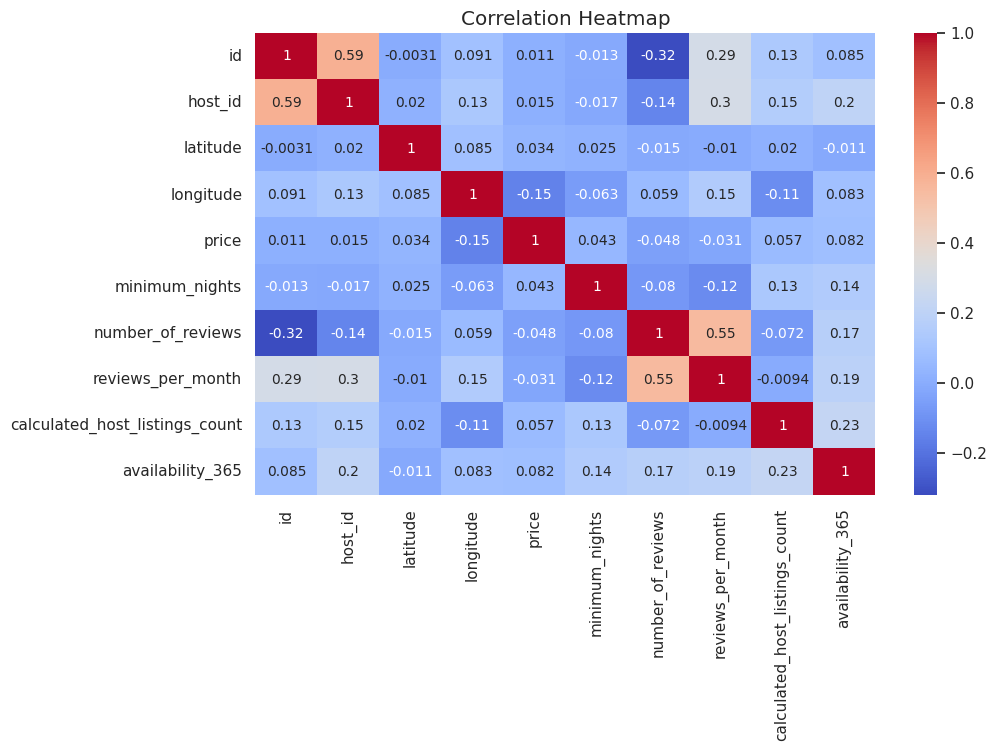

In [60]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

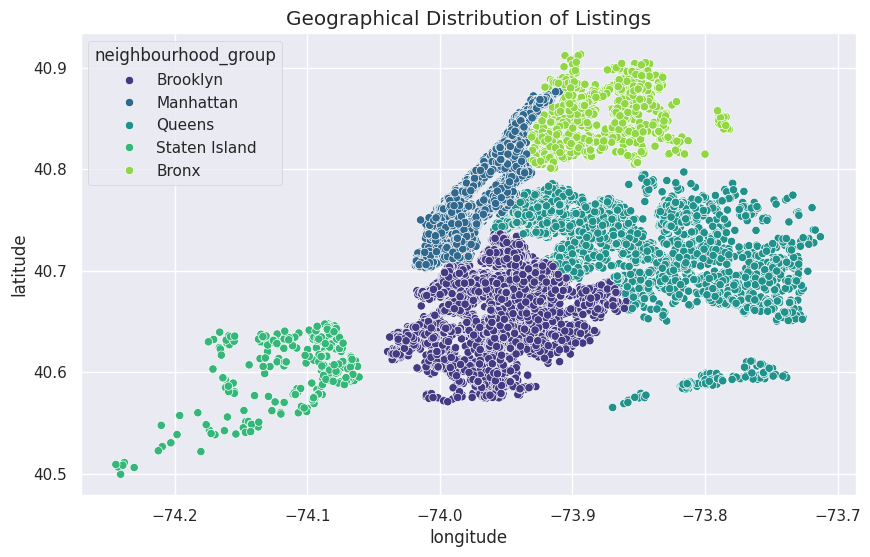

In [61]:
# Geographical distribution of listings
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='viridis')
plt.title("Geographical Distribution of Listings")
plt.show()

In [62]:
# Filling missing values
df['price'].fillna(df['price'].median(), inplace=True)
df['room_type'].fillna(df['room_type'].mode()[0], inplace=True)

In [63]:
# Removing outliers from 'price' column using Z-Score
df = df[(np.abs(stats.zscore(df['price'])) < 3)]

In [64]:
# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group'], drop_first=True)

In [65]:
# Standardizing 'price' and 'minimum_nights'
scaler = StandardScaler()
df[['price', 'minimum_nights']] = scaler.fit_transform(df[['price', 'minimum_nights']])

In [67]:
# Target and features
target = 'price'
X = df.drop(columns=[target, 'id', 'host_id', 'host_name', 'name'])
y = df[target]

In [68]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (38805, 15)
Test set shape: (9702, 15)


In [70]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

In [71]:
# Check the columns explicitly before calling Auto_ViML
print("Columns in the dataset after stripping:")
print(df.columns)

Columns in the dataset after stripping:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island'],
      dtype='object')


In [72]:
# Check if 'price' is in the columns
if 'price' not in df.columns:
    print("The target column 'price' is missing!")
else:
    print("The target column 'price' is present.")

The target column 'price' is present.


In [96]:
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [97]:
import os
print(os.getcwd())  # Check current working directory


/content


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (48895, 16)
    Training Set Memory Usage = 5.97 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: name
Shape of Train Data: 48895 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 65 seconds
Train data Text cleaning completed. Time taken = 69 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = name. This will take time...
    Selected the maximum number of features limit = 5000
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (39116,) and Cross Validation data = (9779,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
[LightGBM] [Info] Auto-choosing col-wise mul

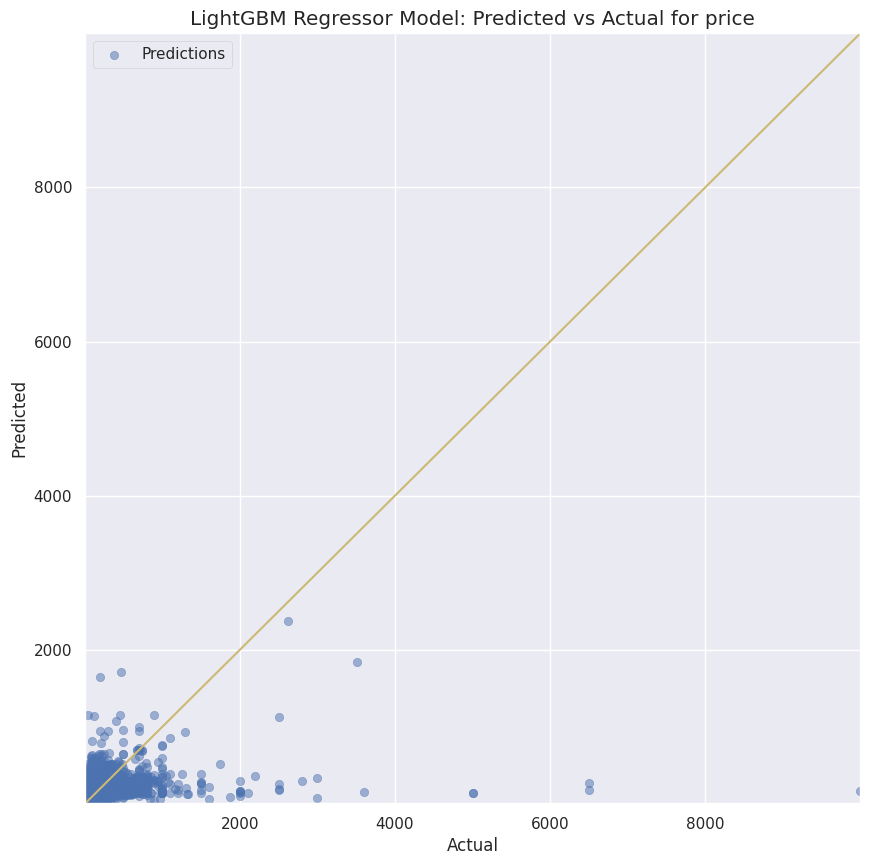

    MAE = 75.3512
    MAPE = 62%
    RMSE = 214.3218
    MAE as % std dev of Actuals = 33.3%
    Normalized RMSE (% of MinMax of Actuals) = 2%
    Normalized RMSE (% of Std Dev of Actuals) = 95%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 54 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 1968 term-matrix to 44 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (48895, 44)
    Time Taken for Truncated SVD = 3 seconds
TruncatedSVD Data Frame size = (48895, 44)
Creating word clusters using term matrix of shape: (48895, 44) from Train data set...
    Running k-means on NLP token matrix to create 3 word clusters.
    Created one new column: name_word_cluster_name using KMeans_Clusters on NLP tra

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: host_name
Shape of Train Data: 48895 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for host_name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 35 seconds
Train data Text cleaning completed. Time taken = 36 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = host_name. This will take time...
    Selected the maximum number of features limit = 4270
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (39116,) and Cross Validation data = (9779,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
[LightGBM] [Info] Auto-choosi

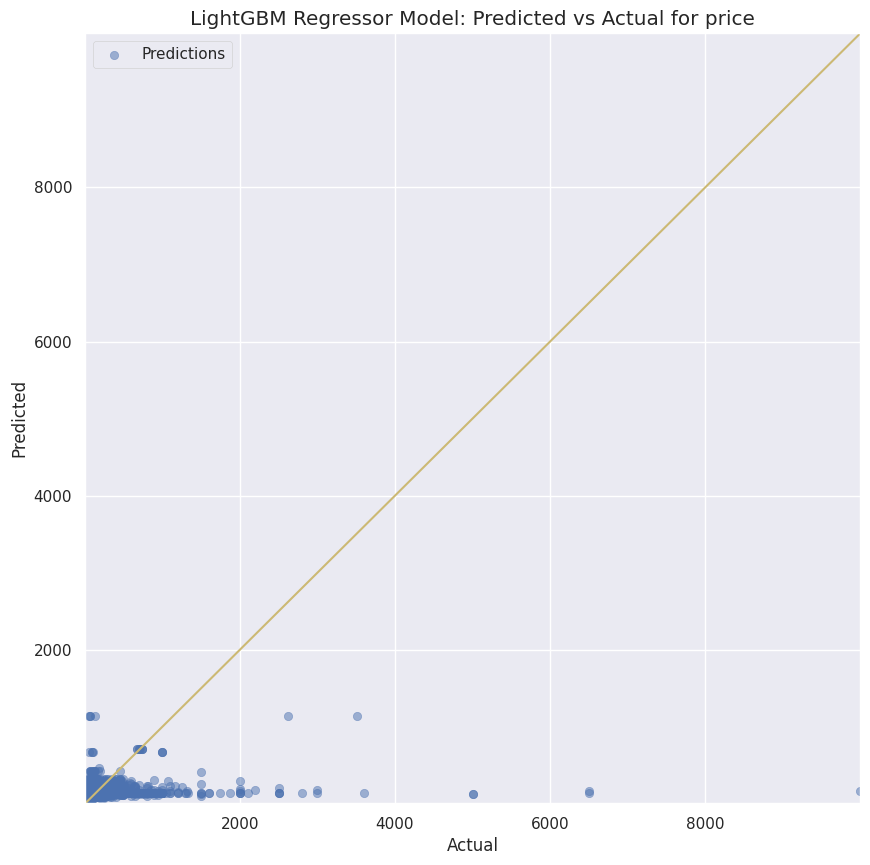

    MAE = 89.4009
    MAPE = 86%
    RMSE = 223.7562
    MAE as % std dev of Actuals = 39.5%
    Normalized RMSE (% of MinMax of Actuals) = 2%
    Normalized RMSE (% of Std Dev of Actuals) = 99%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 34 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 2019 term-matrix to 44 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (48895, 44)
    Time Taken for Truncated SVD = 2 seconds
TruncatedSVD Data Frame size = (48895, 44)
Creating word clusters using term matrix of shape: (48895, 44) from Train data set...
    Running k-means on NLP token matrix to create 3 word clusters.
    Created one new column: host_name_word_cluster_host_name using KMeans_Clusters 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for last_review column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 41 seconds
Train data Text cleaning completed. Time taken = 42 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = last_review. This will take time...
    Selected the maximum number of features limit = 1
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (39116,) and Cross Validation data = (9779,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
Auto_NLP error. Continuing without NLP processing
#######################################################

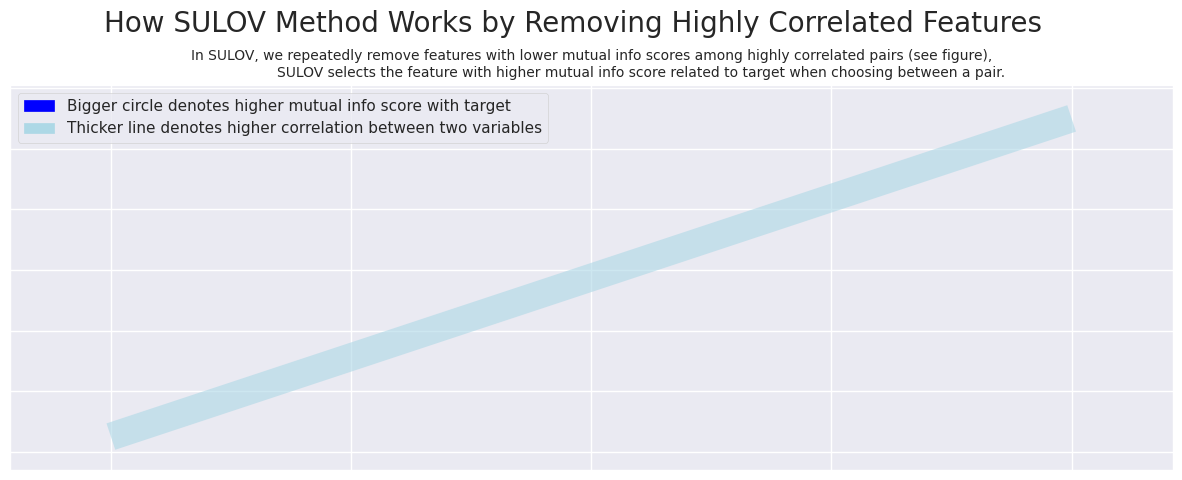

Splitting selected features into float and categorical (integer) variables:
    (98) float variables ...
    (32) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 130 
    Finding Important Features using Boosted Trees algorithm...
        using 130 variables...
        using 104 variables...
        using 78 variables...
        using 52 variables...
        using 26 variables...
Found 75 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  39116 , CV rows =  9779
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax s

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.


    Actual training time (in seconds): 229
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation rmse Score = 238.1408
    Best Parameters for Model = {'C': 41.166323884293845, 'epsilon': 0.09686526126266715}
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
Regression Plots completed in 0.062 seconds
    MAE = 65.0260
    MAPE = 827% (MAPE will be very high when zeros in actuals)
    RMSE = 206.0877
    Normalized MAE (as % std dev of Actuals) = 30%
    Normalized RMSE (% of Std Dev of Actuals) = 97%
################# E N S E M B L E  M O D E L  ##################
Time taken = 178 seconds
Based on trying multiple models, Best type of algorithm for this data set is Bagging_Regressor
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################
Regression Plots completed in 0.058 seconds
    MAE = 74.

AttributeError: 'tuple' object has no attribute 'fit'

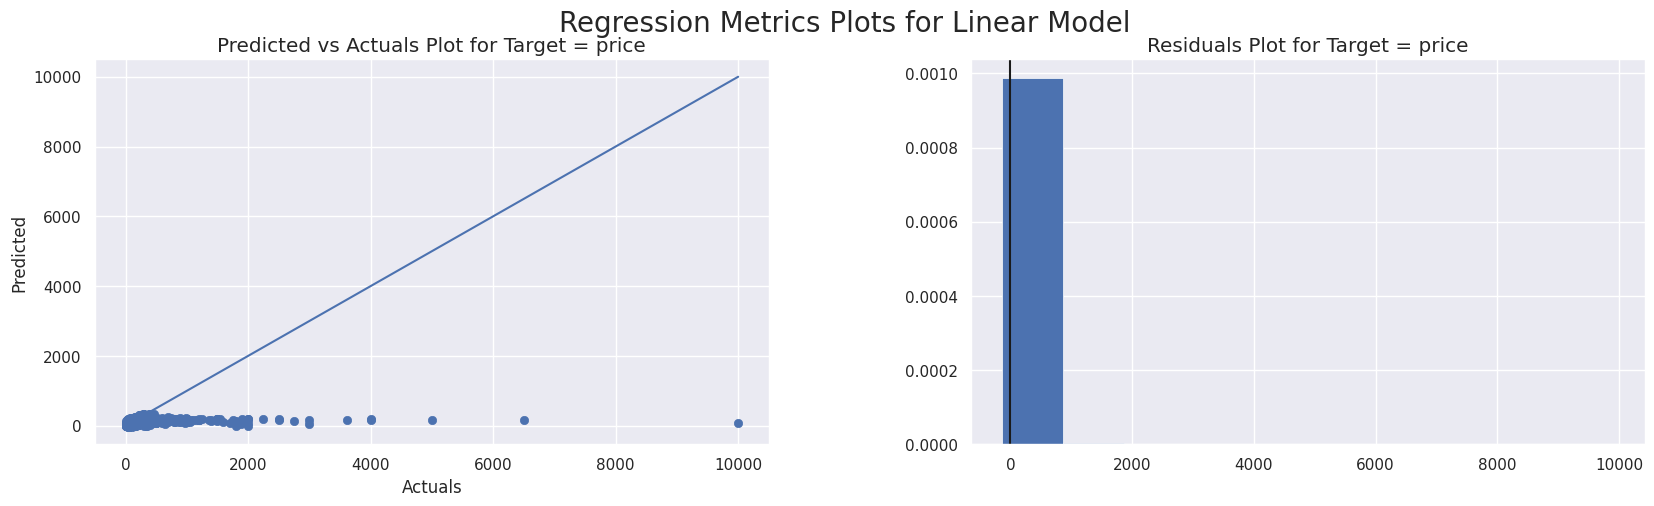

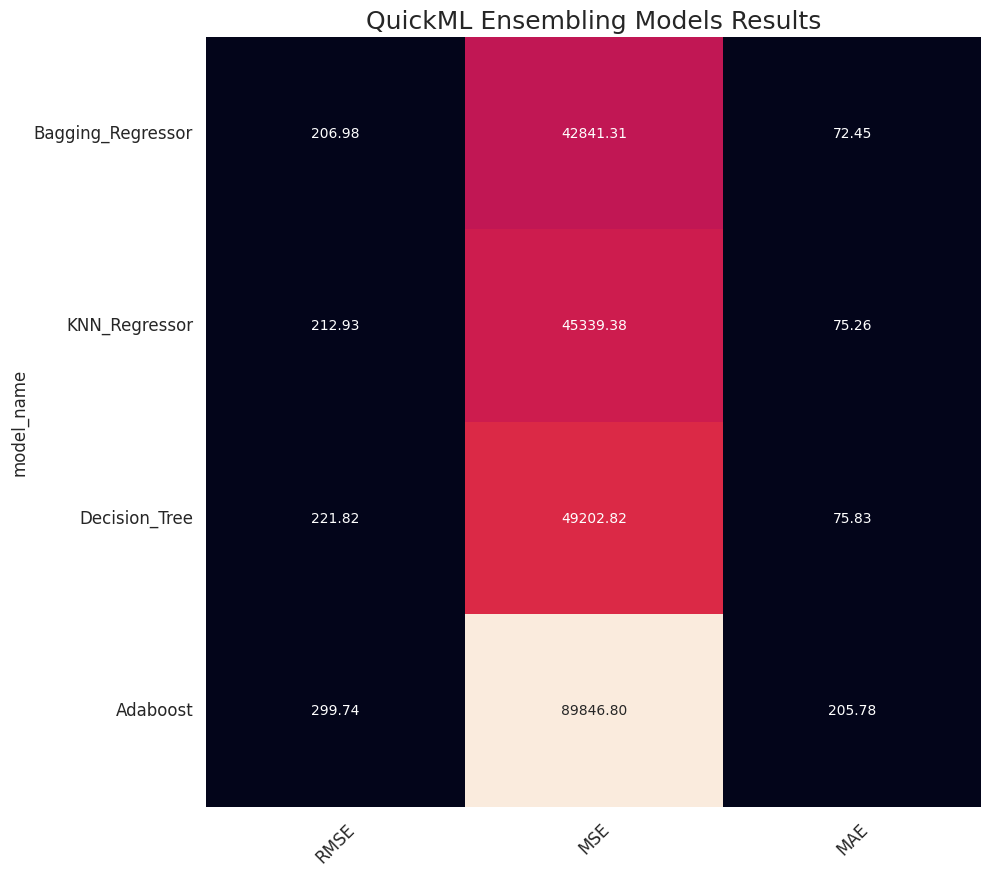

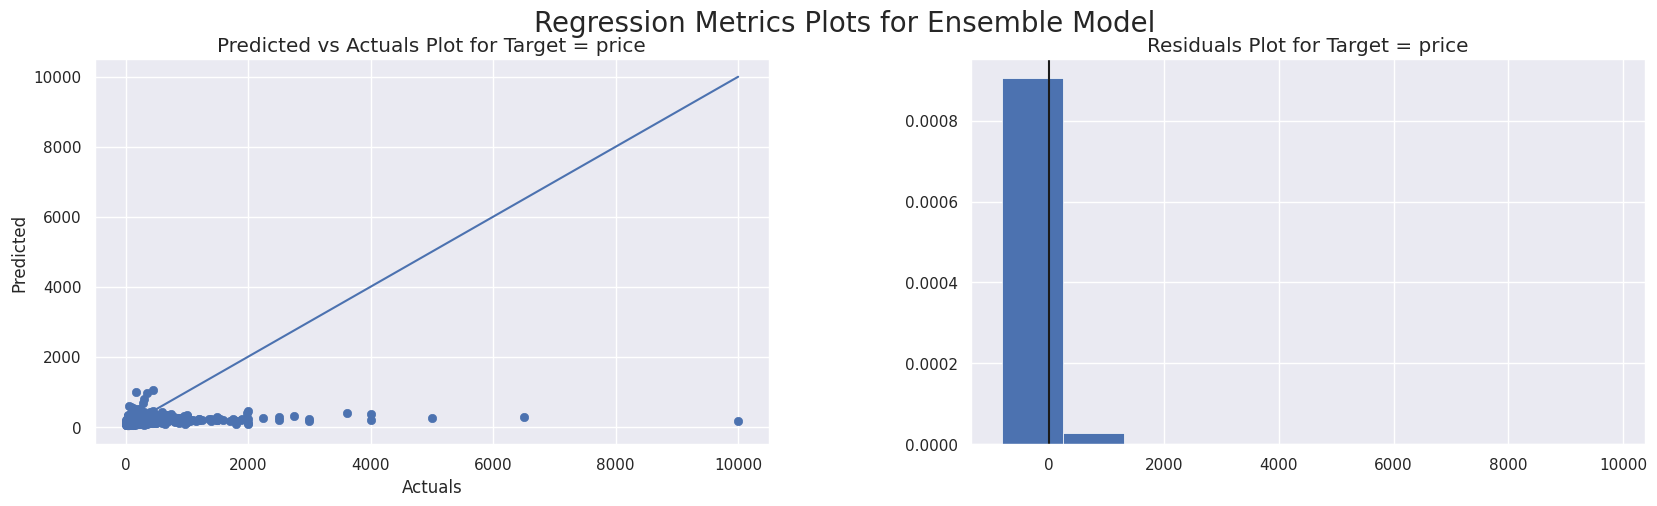

In [98]:
# Import necessary libraries
import pandas as pd
import autoviml
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'your_airbnb_data.csv' with your actual data file)
df = pd.read_csv('AB_NYC_2019.csv')

# Ensure that 'price' exists in the columns
print(df.columns)

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['price'])  # Exclude the target column
y = df['price']  # Target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AutoViML with training data and the correct target column
model = autoviml.Auto_ViML(train=df, target='price')

# Fit the model (Note: AutoViML handles both training and testing internally)
model.fit()

# Get predictions on the test set (AutoViML handles predictions)
y_pred = model.predict(X_test)

# Display predicted vs actual prices
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())
